# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнила студентка группы БФИ2001 Вострикова Полина
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

In [1]:
import time
import turtle

# ф-ция для задания строки движения черепашки (последний параметр - словарь)
def L_system(iters, axiom, rules):
    if iters == 0:
        return axiom    
    start_string = axiom
    end_string = ""
    for i in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string) # берём i-ое значение, если есть i-ый ключ
        start_string = end_string                                                 # иначе перезапись просто; затем присваивание
    return end_string
        

# ф-ция для отрисовки
def drawing_a_fractal(t, instructions, angle, length):
    if len(instructions) != 0:
        if instructions[0] == 'F':
            t.forward(length)
            drawing_a_fractal(t, instructions[1:], angle, length)
        elif instructions[0] == '+':
            t.right(angle)
            drawing_a_fractal(t, instructions[1:], angle, length)
        elif instructions[0] == '-':
            t.left(angle)
            drawing_a_fractal(t, instructions[1:], angle, length)
        elif instructions[0] == 'C':
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
            drawing_a_fractal(t, instructions[1:], angle, length)
        elif instructions[0] == 'f':
            t.up()
            t.forward(length)
            t.down()
            drawing_a_fractal(t, instructions[1:], angle, length)
        else: drawing_a_fractal(t, instructions[1:], angle, length)
            
# # ф-ция для отрисовки итерациями. позволяет отрисовывать с большей глубиной
def drawing_a_fractal2(t, instructions, angle, length):
    turtle_stack = [] 
    for cmd in instructions:
        if cmd == 'F':
            t.forward(length)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)
        elif cmd == 'C':
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
            t.forward(length)
            t.left(angle)
        elif cmd == 'f':
            t.up()
            t.forward(length)
            t.down()
        elif cmd == '[':
            turtle_stack.append(t.xcor())
            turtle_stack.append(t.ycor())
            turtle_stack.append(t.heading())
        elif cmd == ']':
            t.up()
            t.setheading(turtle_stack.pop())
            t.sety(turtle_stack.pop())
            t.setx(turtle_stack.pop())
            t.down()
            
def main(iterations, axiom, rules, angle, coordinate_x = 0, coordinate_y = 0, length = 5, angle2 = 0):
    instructions = L_system(iterations, axiom, rules)

    t = turtle.Turtle()
    t.up()
    t.hideturtle()
    t.speed(1000)
    t.goto(coordinate_x, coordinate_y) # перемещаем (при необходимости)
    t.left(angle2)
    t.down()
    
    drawing_a_fractal(t, instructions, angle, length)
    
    turtle.done()

def main2(iterations, axiom, rules, angle, coordinate_x = 0, coordinate_y = 0, length = 5, angle2 = 0):
    instructions = L_system(iterations, axiom, rules)

    t = turtle.Turtle()
    t.up()
    t.hideturtle()
    t.speed(10000)
    t.goto(coordinate_x, coordinate_y) # перемещаем (при необходимости)
    t.left(angle2)
    t.down()
    
    drawing_a_fractal2(t, instructions, angle, length)
    
    turtle.done()

### Выполнение:

In [3]:
# Кривая Коха (4)
axiom = "F"
rule = {"F":"F-F++F-F"} 
iterations = int(input('Введите кол-во итераций: '))
angle = 60    

start_time = time.perf_counter()  
main(iterations, axiom, rule, angle, -300)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 4
--- 9676.217 ms ---


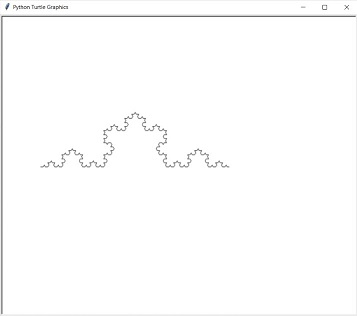

In [3]:
# звезда коха
# axiom = "F--F--F"
# rule = {"F":"F+F--F+F"} 
# iterations = int(input('Введите кол-во итераций: '))
# angle = 60    

# start_time = time.perf_counter()  
# main(iterations, axiom, rule, angle, -200, -150)
# print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

In [6]:
# Кривая Гильберта (4)
axiom = "L"
rules = {"L":"+RF-LFL-FR+", "R":"-LF+RFR+FL-"}
iterations = int(input('Введите кол-во итераций: '))
angle = 90

start_time = time.perf_counter()  
main(iterations, axiom, rules, angle, -200, 300, 15)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 4
--- 9454.156 ms ---


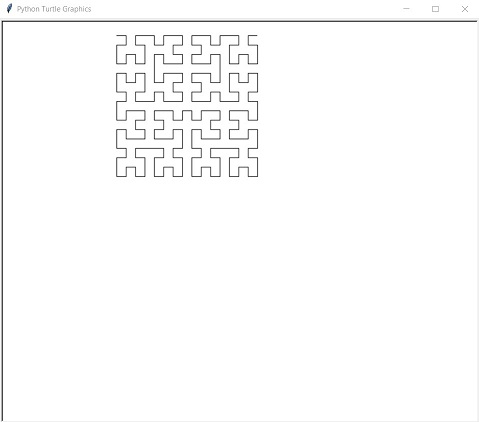

In [2]:
# Кривая Серпинского (3)
axiom = "F+XF+F+XF"
rules = {"X":"XF-F+F-XF+F+XF-F+F-X"}
iterations = int(input('Введите кол-во итераций: '))
angle = 90

start_time = time.perf_counter()  
main(iterations, axiom, rules, angle, 0, 300)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 4
--- 43109.529 ms ---


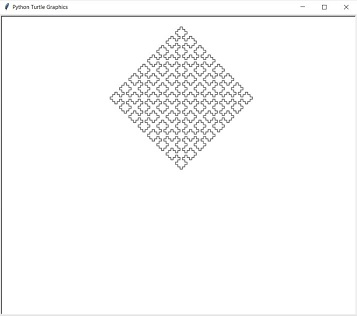

In [7]:
# Салфетка Серпинского (4)
axiom = "FXF--FF--FF"
rules = {"F":"FF", "X":"--FXF++FXF++FXF--"}
iterations = int(input('Введите кол-во итераций: '))
angle = 60

start_time = time.perf_counter()  
main(iterations, axiom, rules, angle, 0, -300, 10)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 4
--- 12872.896 ms ---


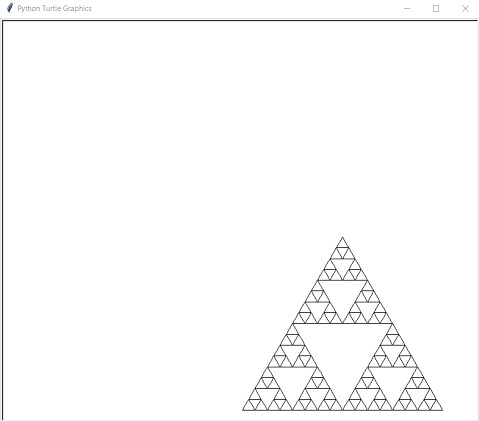

In [5]:
# Ковер Серпинского (3)
axiom = "C"
rules = {"C":"CfCfC-f+C-f+C--f--C--f--C+f-C+f-", "f":"fff"}
iterations = int(input('Введите кол-во итераций: '))
angle = 90

start_time = time.perf_counter()  
main(iterations, axiom, rules, angle, -400, -300, 5)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 4
--- 1216615.664 ms ---


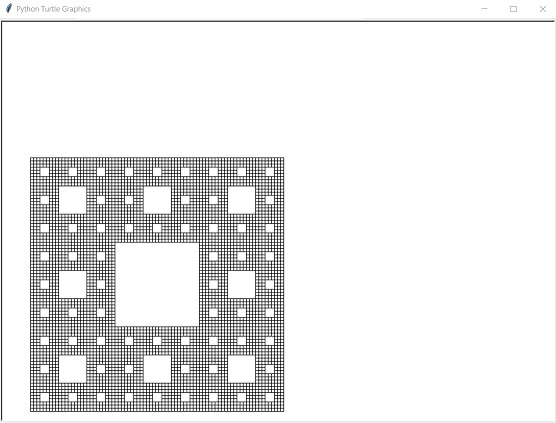

In [6]:
# Дерево Пифагора (7)
axiom = "A"
rules = {"F":"FF", "A":"F[+A][-A]"}
iterations = int(input('Введите кол-во итераций: '))
angle = 45

start_time = time.perf_counter()  
main2(iterations, axiom, rules, angle, 0, -300, 5, 90)
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

Введите кол-во итераций: 7
--- 32192.213 ms ---


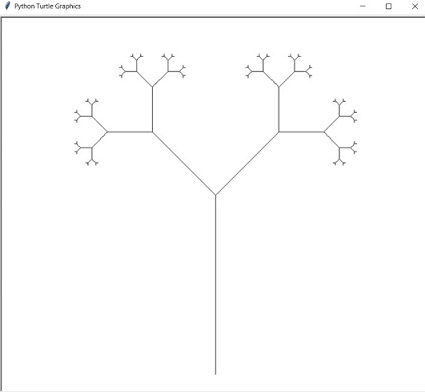

### Вывод

In [2]:
import pandas as pd
table = [["Кривая Коха", "246.950 ms", "705.433 ms", "2524.969 ms", "9712.476 ms"],
        ["Кривая Гильберта", "233.624 ms", "662.237 ms", "2467.668 ms", "9390.810 ms"],
        ["Кривая Серпинского", "748.856 ms", "2723.101 ms", "10813.000 ms", "43109.529 ms"],
        ["Салфетка Серпинского", "791.729 ms", "1517.519 ms", "4386.151 ms", "12872.896 ms"],
        ["Ковер Серпинского", "1950.327 ms", "15166.249 ms", "127253.932 ms", "1216615.664 ms"],
        ["Дерево Пифагора", "912.941 ms", "964.632 ms", "1616.849 ms", "3441.404 ms"]]

pd.DataFrame(table, columns=["Фрактал","1-ая итерация", "2-ая итерация", "3-ая итерация", "4-ая итерация"])

,Фрактал,1-ая итерация,2-ая итерация,3-ая итерация,4-ая итерация
0,Кривая Коха,246.950 ms,705.433 ms,2524.969 ms,9712.476 ms
1,Кривая Гильберта,233.624 ms,662.237 ms,2467.668 ms,9390.810 ms
2,Кривая Серпинского,748.856 ms,2723.101 ms,10813.000 ms,43109.529 ms
3,Салфетка Серпинского,791.729 ms,1517.519 ms,4386.151 ms,12872.896 ms
4,Ковер Серпинского,1950.327 ms,15166.249 ms,127253.932 ms,1216615.664 ms
5,Дерево Пифагора,912.941 ms,964.632 ms,1616.849 ms,3441.404 ms


Вывод:в ходе лабораторной работы были освоены L-структура, рекурсия и фракталы. С помощью L-структуры были реализованы генерации различных фракталов с применением рекурсивных функций. Самым затратным по времени генерации оказался фрактал "Ковер Серпинского". 